In [1]:
import json

positive_phantom_files = json.load(open("data/positive_phantom_files.json"))
negative_phantom_files = json.load(open("data/negative_phantom_files.json"))
print(len(positive_phantom_files), len(negative_phantom_files))

14376 4933


In [2]:
import os

positive_phantom_file_cnt = {}
for name, values in positive_phantom_files.items():
    for fname, _ in values["phantom_file"]:
        f = os.path.basename(fname)
        positive_phantom_file_cnt[f] = positive_phantom_file_cnt.get(f, set())
        positive_phantom_file_cnt[f].add(name)

positive_phantom_file_cnt = {k: len(v) for k, v in positive_phantom_file_cnt.items()}
positive_phantom_file_cnt = sorted(
    positive_phantom_file_cnt.items(), key=lambda x: x[1], reverse=True
)

negative_phantom_file_cnt = {}
for name, values in negative_phantom_files.items():
    for fname, _ in values["phantom_file"]:
        f = os.path.basename(fname)
        negative_phantom_file_cnt[f] = negative_phantom_file_cnt.get(f, set())
        negative_phantom_file_cnt[f].add(name)
negative_phantom_file_cnt = {k: len(v) for k, v in negative_phantom_file_cnt.items()}
negative_phantom_file_cnt = sorted(
    negative_phantom_file_cnt.items(), key=lambda x: x[1], reverse=True
)

print(len(positive_phantom_file_cnt), len(negative_phantom_file_cnt))

172238 43109


In [7]:
import pandas as pd

tmp1 = []
for k, v in positive_phantom_file_cnt[:10]:
    tmp1.append([k, v, f"{v/len(positive_phantom_files):.1%}"])
tmp1 = pd.DataFrame(tmp1, columns=["filename_p", "release_p", "percent_p"])

tmp2 = []
for k, v in negative_phantom_file_cnt[:10]:
    tmp2.append([k, v, f"{v/len(negative_phantom_files):.1%}"])
tmp2 = pd.DataFrame(tmp2, columns=["filename_n", "release_n", "percent_n"])

pd.concat([tmp1, tmp2], axis=1)

,filename_p,release_p,percent_p,filename_n,release_n,percent_n
0,setup.cfg,12361,86.0%,setup.cfg,4563,92.5%
1,setup.py,1891,13.2%,setup.py,3760,76.2%
2,__init__.py,558,3.9%,README.md,2967,60.1%
3,_version.py,397,2.8%,__init__.py,2090,42.4%
4,README.md,385,2.7%,pyproject.toml,1594,32.3%
5,make.bat,333,2.3%,LICENSE,1312,26.6%
6,version.py,288,2.0%,README.rst,343,7.0%
7,favicon.ico,254,1.8%,MANIFEST.in,312,6.3%
8,MANIFEST.in,253,1.8%,LICENSE.txt,282,5.7%
9,pyproject.toml,227,1.6%,utils.py,252,5.1%


In [8]:
positive_phantom_pyfile_cnt = [
    [k, _] for k, _ in positive_phantom_file_cnt if k.endswith(".py")
]
negative_phantom_pyfile_cnt = [
    [k, _] for k, _ in negative_phantom_file_cnt if k.endswith(".py")
]
print(len(positive_phantom_pyfile_cnt), len(negative_phantom_pyfile_cnt))

tmp1 = []
for k, v in positive_phantom_pyfile_cnt[:10]:
    tmp1.append([k, v, f"{v/len(positive_phantom_files):.1%}"])
tmp1 = pd.DataFrame(tmp1, columns=["filename_p", "release_p", "percent_p"])

tmp2 = []
for k, v in negative_phantom_pyfile_cnt[:10]:
    tmp2.append([k, v, f"{v/len(negative_phantom_files):.1%}"])
tmp2 = pd.DataFrame(tmp2, columns=["filename_n", "release_n", "percent_n"])

pd.concat([tmp1, tmp2], axis=1)

25601 20966


,filename_p,release_p,percent_p,filename_n,release_n,percent_n
0,setup.py,1891,13.2%,setup.py,3760,76.2%
1,__init__.py,558,3.9%,__init__.py,2090,42.4%
2,_version.py,397,2.8%,utils.py,252,5.1%
3,version.py,288,2.0%,main.py,209,4.2%
4,__main__.py,80,0.6%,conf.py,170,3.4%
5,utils.py,77,0.5%,example.py,168,3.4%
6,client.py,49,0.3%,__main__.py,154,3.1%
7,config.py,39,0.3%,conftest.py,150,3.0%
8,get_provider_info.py,39,0.3%,base.py,130,2.6%
9,test.py,35,0.2%,models.py,127,2.6%


In [1]:
import pandas as pd

df = pd.read_csv("data/validator_dataset.csv", low_memory=False, keep_default_na=False)
print(df["label"].value_counts().rename({0: "Match", 1: "Mismatch"}))

df.groupby("label")["setup_change"].value_counts().rename(
    {0: "Match", 1: "Mismatch"}, level=0
).rename({0: "no", 1: "yes"}, level=1).reset_index(name="count").pivot(
    index="label", columns="setup_change", values="count"
)

Match       14376
Mismatch     4933
Name: label, dtype: int64


setup_change,no,yes
label,,
Match,12784,1592
Mismatch,111,4822


In [2]:
df.groupby("label")[
    [
        "num_phantom_pyfiles",
        "name_similarity",
        "num_maintainers",
        "num_maintainer_pkgs",
        # "maintainer_max_downloads",
    ]
].describe().stack(level=0)

25%       50%    75%    count      max  \
label                                                                    
0     name_similarity      1.000000  1.000000   1.00  14376.0      1.0   
      num_maintainer_pkgs  3.000000  8.000000  25.00  14376.0  13834.0   
      num_maintainers      1.000000  1.000000   2.00  14376.0     30.0   
      num_phantom_pyfiles  0.000000  0.000000   1.00  14376.0  12633.0   
1     name_similarity      0.263158  0.347826   0.55   4933.0      1.0   
      num_maintainer_pkgs  1.000000  2.000000   5.00   4933.0    737.0   
      num_maintainers      1.000000  1.000000   1.00   4933.0     13.0   
      num_phantom_pyfiles  1.000000  2.000000   5.00   4933.0  18956.0   

                                mean  min         std  
label                                                  
0     name_similarity       0.925523  0.0    0.167982  
      num_maintainer_pkgs  43.348637  0.0  160.805836  
      num_maintainers       1.652824  0.0    1.308228  
      num_phantom_pyfiles   3.217933 -1.0  135.818643  
1     name_similarity       0.422584  0.0    0.223863  
      num_maintainer_pkgs  13.511251  0.0   40.854460  
      num_maintainers       1.044598  0.0    0.357457  
      num_phantom_pyfiles  14.978917 -1.0  284.506704

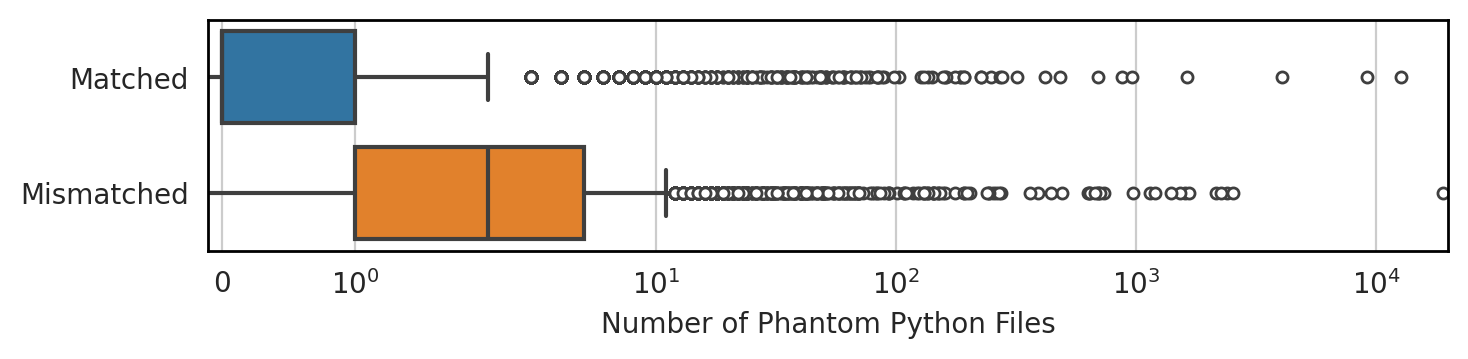

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format="retina"


def plot_phantom_pyfiles_dist(data):
    with sns.axes_style("whitegrid"):
        # sns.set_style("whitegrid")
        fig, ax = plt.subplots(figsize=(8, 1.5))
        sns.boxplot(
            data,
            x="num_phantom_pyfiles",
            y="label",
            orient="h",
            showfliers=True,
            flierprops={"marker": "o", "markerfacecolor": "white", "markersize": 4},
            ax=ax,
        )
        ax.set_xscale("symlog", base=10)
        ax.set_xlim(-0.1)
        ax.set_yticklabels(["Matched", "Mismatched"])
        ax.set_ylabel(None)
        ax.set_xlabel("Number of Phantom Python Files")
        for spine in ax.spines.values():
            spine.set_color("black")
            spine.set_linewidth(1)

        fig.savefig("figures/phantom_pyfiles_comparison.pdf", bbox_inches="tight")


plot_phantom_pyfiles_dist(df)

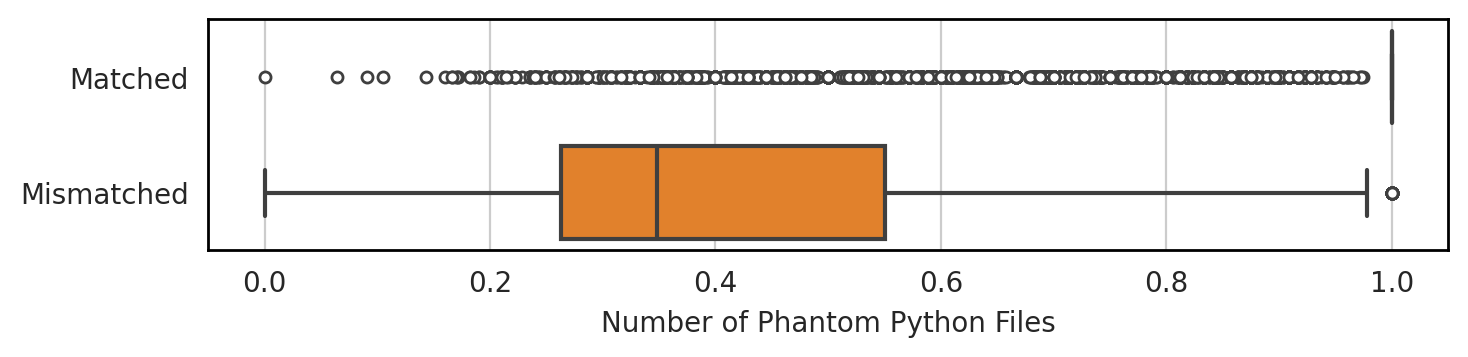

In [5]:
def plot_name_similarity_dist(data):
    with sns.axes_style("whitegrid"):
        # sns.set_style("whitegrid")
        fig, ax = plt.subplots(figsize=(8, 1.5))
        sns.boxplot(
            data,
            x="name_similarity",
            y="label",
            orient="h",
            showfliers=True,
            flierprops={"marker": "o", "markerfacecolor": "white", "markersize": 4},
            ax=ax,
        )
        # ax.set_xscale("symlog", base=10)
        # ax.set_xlim(-0.1)
        ax.set_yticklabels(["Matched", "Mismatched"])
        ax.set_ylabel(None)
        ax.set_xlabel("Number of Phantom Python Files")
        for spine in ax.spines.values():
            spine.set_color("black")
            spine.set_linewidth(1)

        # fig.savefig("figures/phantom_pyfiles_comparison.pdf", bbox_inches="tight")


plot_name_similarity_dist(df)

In [9]:
df[df["label"] == 1]["name_similarity"].describe(
    percentiles=(0.5, 0.6, 0.7, 0.75, 0.8, 0.9)
)

count    4933.000000
mean        0.422584
std         0.223863
min         0.000000
50%         0.347826
60%         0.400000
70%         0.480000
75%         0.550000
80%         0.631579
90%         0.800000
max         1.000000
Name: name_similarity, dtype: float64

In [21]:
from joblib import load
import pandas as pd
from sklearn.metrics import roc_auc_score

df = pd.read_csv("data/validator_dataset.csv")
tmp = df[
    ((df["label"] == 1) & (df["setup_change"] == 0))
    | ((df["label"] == 0) & (df["setup_change"] == 1))
]
print(len(tmp[tmp["label"] == 1]), len(tmp[tmp["label"] == 0]))

for model_name in ["lr", "dt", "rf", "ada", "gb", "xgb"]:
    model = load(f"models/best_{model_name}.joblib")
    pred = pd.read_csv(f"data/{model_name}_prediction.csv")
    print(
        roc_auc_score(
            tmp["label"],
            model.predict_proba(
                tmp[
                    [
                        "num_phantom_pyfiles",
                        "setup_change",
                        "name_similarity",
                        "tag_match",
                        "num_maintainers",
                        "num_maintainer_pkgs",
                        # "maintainer_max_downloads",
                    ]
                ]
            )[:, 1],
        ),
        roc_auc_score(pred["true"], pred["score"]),
    )

110 1592
0.894281064412974 0.9657729166264788
0.8312471448149841 0.9927538828312746
0.9289116034719049 0.997110734312802
0.9055333485609867 0.9925539584353543
0.9117576518958428 0.9976821644313151
0.9001484696208315 0.997843867986839


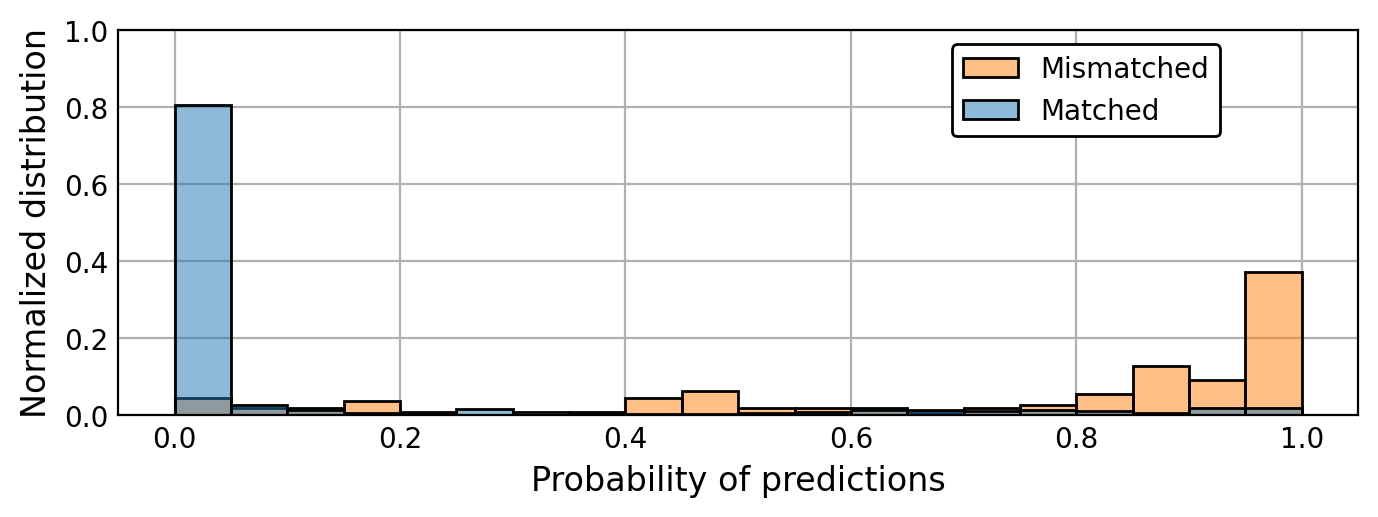

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


def plot_prediction(model_name: str, filter=False):
    data = pd.read_csv(f"data/{model_name}_prediction.csv")
    if filter:
        df = pd.read_csv("data/validator_dataset.csv")
        data = data[
            ((df["label"] == 1) & (df["setup_change"] == 0))
            | ((df["label"] == 0) & (df["setup_change"] == 1))
        ]

    with sns.axes_style():
        fig, ax = plt.subplots(figsize=(8, 2.5))
        sns.histplot(
            data,
            x="score",
            hue="true",
            bins=20,
            binrange=[0, 1],
            stat="probability",
            common_norm=False,
            ax=ax,
        )
        # change legend location
        ax.legend(
            labels=["Mismatched", "Matched"],
            loc="upper right",
            bbox_to_anchor=(0.9, 1.0),
            facecolor="white",
            framealpha=1,
            edgecolor="black",
        )
        ax.grid(True)
        ax.set_axisbelow(True)
        ax.set_ylim(0, 1.0)
        ax.tick_params(length=0)
        ax.set_xlabel("Probability of predictions", fontsize=12)
        ax.set_ylabel("Normalized distribution", fontsize=12)


plot_prediction("rf", filter=True)